# CausalKit Data Module Examples

This notebook demonstrates how to use the functions and classes in the `causalkit.data` module. The data module provides tools for:

1. **Generating synthetic data** for causal inference tasks
2. **Managing causal data** with the `causaldata` class

We'll explore both of these capabilities with practical examples.


## 1. Data Generation Functions

The `causalkit.data` module provides functions to generate synthetic data for causal inference tasks. These functions are useful for:

- Testing causal inference methods
- Demonstrating causal inference concepts
- Benchmarking different approaches

Let's explore the available data generation functions.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style('whitegrid')

# Import data generation functions
from causalkit.data import generate_rct_data, generate_obs_data


### 1.1 Generating Randomized Controlled Trial (RCT) Data

The `generate_rct_data` function creates synthetic data that mimics a randomized controlled trial. In an RCT, treatment assignment is random and independent of any covariates.


In [9]:
# Generate RCT data with default parameters
rct_df = generate_rct_data(random_state=42)

# Display the first few rows
print(f"Generated RCT data with {len(rct_df)} rows and {len(rct_df.columns)} columns")
rct_df.head()


Generated RCT data with 20000 rows and 8 columns


,user_id,treatment,target,age,cnt_trans,platform_Android,platform_iOS,invited_friend
0,abf91333-2964-4371-9a02-cb38dd65ef07,1,0,20,1,0,1,0
1,978315f4-1264-4f42-91a1-527f1c4f2abc,1,0,44,0,0,1,0
2,cf077772-98be-4561-8496-52c34f164202,1,0,44,0,0,1,0
3,5e97e3bc-4eaf-4d74-8cfb-f702507a4140,1,0,31,2,0,1,0
4,9ef556bb-55ec-43e1-8443-19eb1d2cfcc3,1,0,39,2,0,1,0


Let's examine the structure of the generated data:


In [10]:
# Display summary statistics
rct_df.describe()


,treatment,target,age,cnt_trans,platform_Android,platform_iOS,invited_friend
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.500000,0.108450,35.486350,1.714950,0.418750,0.581250,0.076300
std,0.500013,0.310956,8.034379,1.455336,0.493367,0.493367,0.265484
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,35.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,41.000000,2.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,72.000000,12.000000,1.000000,1.000000,1.000000


Treatment distribution:
treatment
1    0.5
0    0.5
Name: proportion, dtype: float64


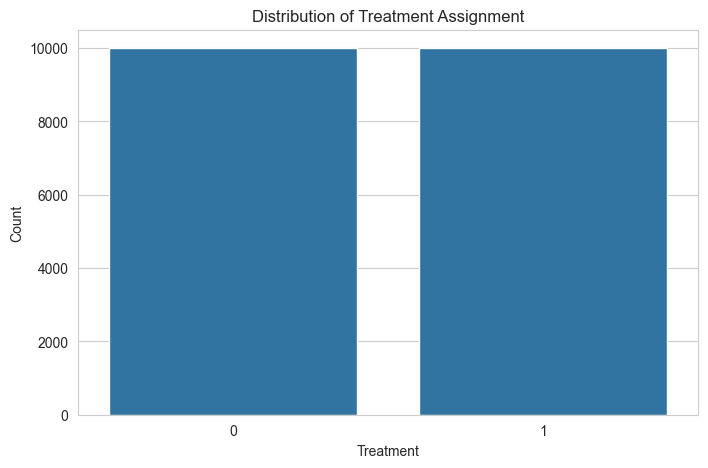

In [11]:
# Check the distribution of treatment assignment
treatment_counts = rct_df['treatment'].value_counts(normalize=True)
print("Treatment distribution:")
print(treatment_counts)

# Visualize the treatment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=rct_df)
plt.title('Distribution of Treatment Assignment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


Let's also look at the relationship between treatment and outcome:


Average outcome by treatment group:
treatment
0    0.1002
1    0.1167
Name: target, dtype: float64


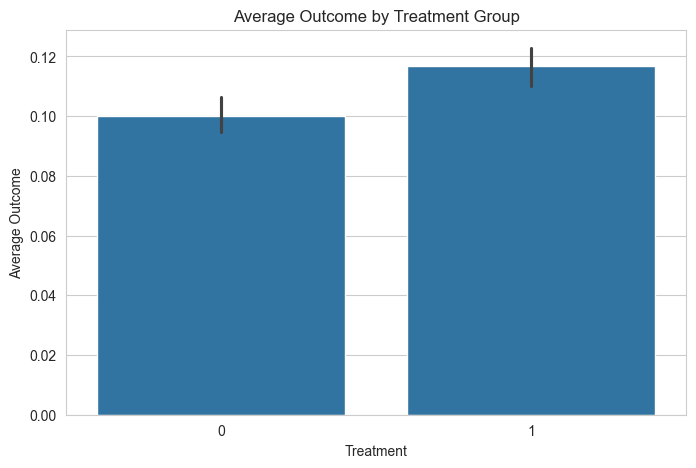

In [12]:
# Calculate average outcome by treatment group
avg_outcome = rct_df.groupby('treatment')['target'].mean()
print("Average outcome by treatment group:")
print(avg_outcome)

# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.barplot(x='treatment', y='target', data=rct_df)
plt.title('Average Outcome by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Average Outcome')
plt.show()


### 1.2 Customizing RCT Data Generation

The `generate_rct_data` function allows customization of various parameters:


In [13]:
# Generate RCT data with custom parameters
custom_rct_df = generate_rct_data(
    n_users=10000,           # Number of users
    split=0.7,               # 70% in control, 30% in treatment
    target_type="binary", # Continuous outcome variable
    random_state=42          # For reproducibility
)

# Display the first few rows
print(f"Generated custom RCT data with {len(custom_rct_df)} rows")
custom_rct_df.head()


Generated custom RCT data with 10000 rows


,user_id,treatment,target,age,cnt_trans,platform_Android,platform_iOS,invited_friend
0,06016028-5d4e-41f1-a97f-1f020283b2f3,1,0,18,1,0,1,0
1,c088ba4a-b213-431e-bce7-29371724fd0c,1,0,32,4,1,0,0
2,cfa15095-a072-4354-b66f-20dbf723e927,1,0,24,2,1,0,0
3,a6048d3d-a0b3-4bf7-9415-615a0d3b8f2f,1,0,33,2,0,1,0
4,a2993a28-46bb-4154-a336-4091c318e06a,1,0,37,1,1,0,0


Treatment distribution:
treatment
1    0.7
0    0.3
Name: proportion, dtype: float64


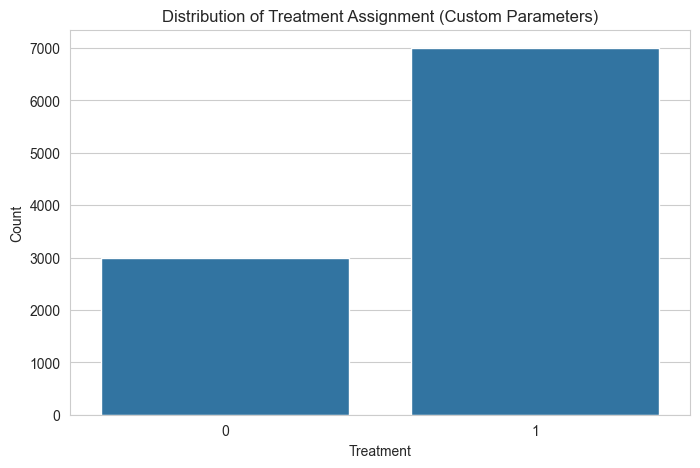

In [14]:
# Check the distribution of treatment assignment
custom_treatment_counts = custom_rct_df['treatment'].value_counts(normalize=True)
print("Treatment distribution:")
print(custom_treatment_counts)

# Visualize the treatment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=custom_rct_df)
plt.title('Distribution of Treatment Assignment (Custom Parameters)')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


### 1.3 Generating Observational Data

The `generate_obs_data` function creates synthetic data that mimics observational studies. In observational data, treatment assignment is not random and may depend on covariates.


In [15]:
# Generate observational data
obs_df = generate_obs_data(random_state=42)

# Display the first few rows
print(f"Generated observational data with {len(obs_df)} rows and {len(obs_df.columns)} columns")
obs_df.head()


Generated observational data with 20000 rows and 7 columns


,user_id,treatment,age,income,education,gender,region
0,4223f4cf-3773-4878-be9d-20090ead9116,0,38,25127,phd,female,central
1,b91f1f7e-a3dc-4b9d-ac72-247a430d4096,0,25,63368,bachelor,male,central
2,e6d91fba-4689-4c36-9c3c-248eb6426e73,0,43,49130,high_school,female,central
3,c35a00c5-cf27-4022-833f-39ae89a867cf,0,44,41001,bachelor,male,north
4,a90c7370-9876-47dd-88a9-0a9fd281ca14,0,18,46238,high_school,male,central


Treatment distribution:
treatment
0    0.89995
1    0.10005
Name: proportion, dtype: float64


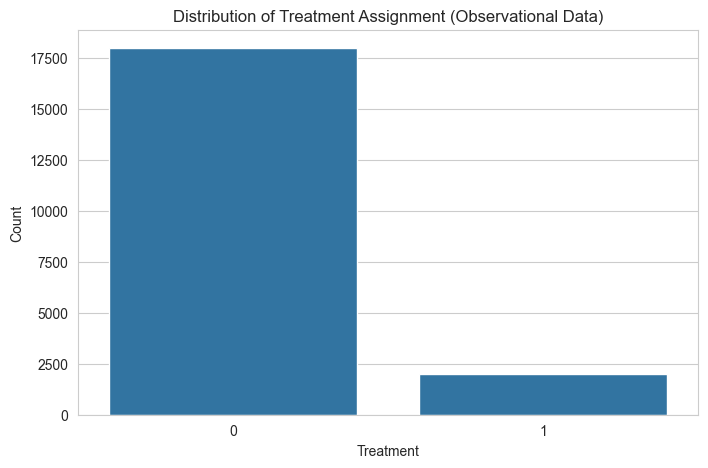

In [16]:
# Check the distribution of treatment assignment
obs_treatment_counts = obs_df['treatment'].value_counts(normalize=True)
print("Treatment distribution:")
print(obs_treatment_counts)

# Visualize the treatment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=obs_df)
plt.title('Distribution of Treatment Assignment (Observational Data)')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


In observational data, treatment assignment often depends on covariates. Let's examine this relationship:


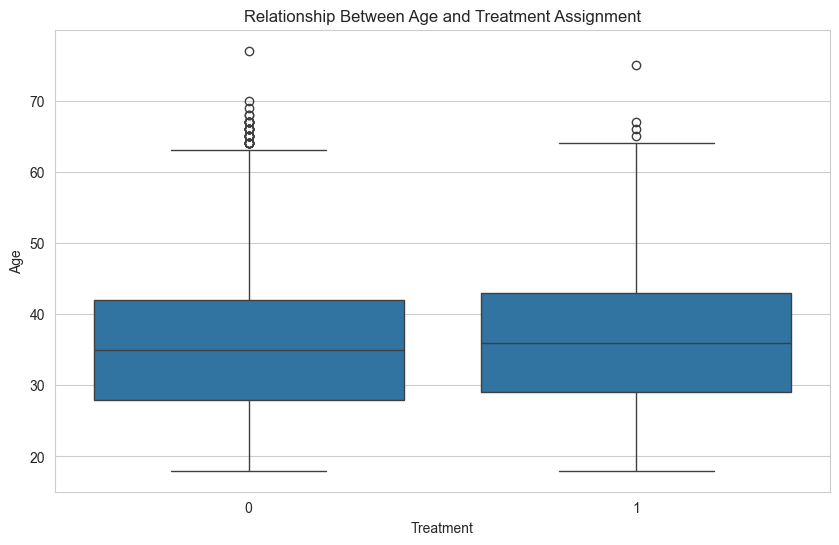

In [17]:
# Examine relationship between age and treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='age', data=obs_df)
plt.title('Relationship Between Age and Treatment Assignment')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.show()


## 2. The causaldata Class

The `causaldata` class provides a convenient way to manage data for causal inference tasks. It wraps a pandas DataFrame and stores metadata about columns for causal inference analysis.


In [18]:
# Import the causaldata class
from causalkit.data import CausalData


### 2.1 Creating a causaldata Object

Let's create a causaldata object using the RCT data we generated earlier:


In [19]:
# Create a causaldata object
ck_data = CausalData(
    df=rct_df,
    target='target',
    cofounders=['age', 'invited_friend'],
    treatment='treatment'
)

# Display the object
print(ck_data)


ckit(df=(20000, 8), target=['target'], cofounders=['age', 'invited_friend'], treatment=['treatment'])


### 2.2 Accessing Data by Role

The causaldata class provides properties to access columns by their role in causal inference:


In [20]:
# Access the target variable
print("Target variable:")
print(ck_data.target.head())

# Access the treatment variable
print("\nTreatment variable:")
print(ck_data.treatment.head())

# Access the cofounders
print("\nCofounders:")
print(ck_data.cofounders.head())


Target variable:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Treatment variable:
0    1
1    1
2    1
3    1
4    1
Name: treatment, dtype: int64

Cofounders:
   age  invited_friend
0   20               0
1   44               0
2   44               0
3   31               0
4   39               0


### 2.3 Using the get_df Method

The `get_df` method allows flexible retrieval of data from the causaldata object:


In [21]:
# Get the entire DataFrame
full_df = ck_data.get_df()
print("Full DataFrame shape:", full_df.shape)
print("Full DataFrame columns:", list(full_df.columns))
print("\nFirst few rows:")
full_df.head()


Full DataFrame shape: (20000, 8)
Full DataFrame columns: ['user_id', 'treatment', 'target', 'age', 'cnt_trans', 'platform_Android', 'platform_iOS', 'invited_friend']

First few rows:


,user_id,treatment,target,age,cnt_trans,platform_Android,platform_iOS,invited_friend
0,abf91333-2964-4371-9a02-cb38dd65ef07,1,0,20,1,0,1,0
1,978315f4-1264-4f42-91a1-527f1c4f2abc,1,0,44,0,0,1,0
2,cf077772-98be-4561-8496-52c34f164202,1,0,44,0,0,1,0
3,5e97e3bc-4eaf-4d74-8cfb-f702507a4140,1,0,31,2,0,1,0
4,9ef556bb-55ec-43e1-8443-19eb1d2cfcc3,1,0,39,2,0,1,0


In [23]:
# Get specific columns
specific_cols_df = ck_data.get_df(columns=['user_id', 'age'])
print("Specific columns DataFrame shape:", specific_cols_df.shape)
print("Specific columns DataFrame columns:", list(specific_cols_df.columns))
print("\nFirst few rows:")
specific_cols_df.head()


Specific columns DataFrame shape: (20000, 2)
Specific columns DataFrame columns: ['user_id', 'age']

First few rows:


,user_id,age
0,abf91333-2964-4371-9a02-cb38dd65ef07,20
1,978315f4-1264-4f42-91a1-527f1c4f2abc,44
2,cf077772-98be-4561-8496-52c34f164202,44
3,5e97e3bc-4eaf-4d74-8cfb-f702507a4140,31
4,9ef556bb-55ec-43e1-8443-19eb1d2cfcc3,39


In [24]:
# Get target and treatment columns
target_treatment_df = ck_data.get_df(include_target=True, include_treatment=True)
print("Target and treatment DataFrame shape:", target_treatment_df.shape)
print("Target and treatment DataFrame columns:", list(target_treatment_df.columns))
print("\nFirst few rows:")
target_treatment_df.head()


Target and treatment DataFrame shape: (20000, 2)
Target and treatment DataFrame columns: ['target', 'treatment']

First few rows:


,target,treatment
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [25]:
# Get cofounders and specific columns
mixed_df = ck_data.get_df(columns=['user_id'], include_cofounders=True)
print("Mixed DataFrame shape:", mixed_df.shape)
print("Mixed DataFrame columns:", list(mixed_df.columns))
print("\nFirst few rows:")
mixed_df.head()


Mixed DataFrame shape: (20000, 3)
Mixed DataFrame columns: ['user_id', 'age', 'invited_friend']

First few rows:


,user_id,age,invited_friend
0,abf91333-2964-4371-9a02-cb38dd65ef07,20,0
1,978315f4-1264-4f42-91a1-527f1c4f2abc,44,0
2,cf077772-98be-4561-8496-52c34f164202,44,0
3,5e97e3bc-4eaf-4d74-8cfb-f702507a4140,31,0
4,9ef556bb-55ec-43e1-8443-19eb1d2cfcc3,39,0


### 2.4 Error Handling

The `get_df` method includes error handling for non-existent columns:


In [26]:
# Try to get a non-existent column
try:
    error_df = ck_data.get_df(columns=['non_existent_column'])
except ValueError as e:
    print(f"Error: {e}")


Error: Column 'non_existent_column' does not exist in the DataFrame.


## 3. Practical Example: Analyzing Treatment Effects

Let's put everything together in a practical example where we analyze treatment effects using the causaldata class:


In [27]:
# Generate new RCT data
analysis_df = generate_rct_data(n_users=5000, random_state=123)

# Create a causaldata object
analysis_data = CausalData(
    df=analysis_df,
    target='target',
    cofounders=['age', 'invited_friend', 'gender'],
    treatment='treatment'
)

# Get the data we need for inference
analysis_subset = analysis_data.get_df(include_target=True, include_treatment=True, include_cofounders=True)
print("Analysis subset shape:", analysis_subset.shape)
print("Analysis subset columns:", list(analysis_subset.columns))
analysis_subset.head()


ValueError: Column 'gender' specified as cofounders does not exist in the DataFrame.

In [28]:
# Calculate average treatment effect
treatment_effect = analysis_subset.groupby('treatment')['target'].mean()
ate = treatment_effect[1] - treatment_effect[0]

print("Average outcome by treatment group:")
print(treatment_effect)
print(f"\nAverage Treatment Effect (ATE): {ate:.4f}")

# Visualize the treatment effect
plt.figure(figsize=(10, 6))
sns.barplot(x='treatment', y='target', data=analysis_subset)
plt.title('Average Outcome by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Average Outcome')
plt.annotate(f"ATE = {ate:.4f}", xy=(0.5, max(treatment_effect) - 0.05), 
             xytext=(0.5, max(treatment_effect) + 0.05),
             ha='center', va='center',
             arrowprops=dict(arrowstyle='->', lw=1.5))
plt.show()


NameError: name 'analysis_subset' is not defined

### 3.1 Heterogeneous Treatment Effects

Let's examine if the treatment effect varies across different subgroups:


In [ ]:
# Calculate treatment effect by gender
gender_effects = analysis_subset.groupby(['gender', 'treatment'])['target'].mean().unstack()
gender_ate = gender_effects[1] - gender_effects[0]

print("Average outcome by gender and treatment group:")
print(gender_effects)
print("\nAverage Treatment Effect by gender:")
print(gender_ate)

# Visualize heterogeneous treatment effects
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='target', hue='treatment', data=analysis_subset)
plt.title('Heterogeneous Treatment Effects by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment')
plt.show()


## 4. Conclusion

In this notebook, we've explored the `causalkit.data` module, which provides tools for generating synthetic data and managing causal data. We've seen how to:

1. Generate synthetic data for randomized controlled trials and observational studies
2. Create and use causaldata objects to manage data for causal inference
3. Access data by role (target, treatment, cofounders)
4. Use the get_df method to flexibly retrieve data
5. Analyze treatment effects using the tools provided

These tools make it easier to work with causal inference data and focus on the analysis rather than data management.